# 🍔 Fully Connected Feed-Forward Network

In this notebook we will play with Feed-Forward FC-NN (Fully Connected Neural Network) for a *classification task*:

Image Classification on Fashion-MNIST Dataset

**RECALL**

In the FC-NN, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are the weight matrix and the bias vector for the $i$-th layer, respectively.
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

Our loss function will be the **categorical crossentropy**.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import tensorflow as tf

%matplotlib inline

## Data preparation (`keras.dataset`)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of $60,000$ examples and a test set of $10,000$ examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `categorical_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
print('Number of categories:',len(set(y_train)))

Number of categories: 10


In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train /= 255
X_test /= 255


Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

#### Split Training and Validation Data

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [7]:
print('Size of the train set:', X_train.shape)

Size of the train set: (45000, 784)


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

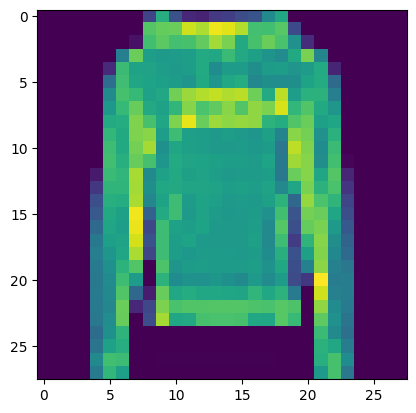

In [8]:
plt.imshow(X_train[6].reshape(28, 28))
Y_train[6]

In [9]:
print(np.asarray(range(10)))
print(Y_train[6].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 1 0 0 0 0 0 0 0]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

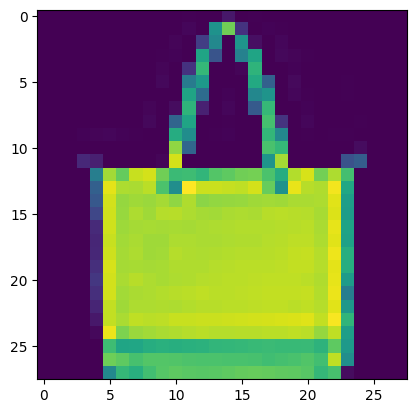

In [10]:
plt.imshow(X_val[0].reshape(28, 28))
Y_val[0]

In [11]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 1 0]


## Model definition

Using the objects and functions introduced in the last lecture, define a simple model with at least **six** fully connected layers. Choose an appropriate architecture and a suitable combination of activation functions.

In [ ]:
from keras import activations
from keras.utils import set_random_seed

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu))
model.add(Dense(256, activation=activations.relu))
model.add(Dense(256, activation=activations.relu))
model.add(Dense(128, activation=activations.relu))
model.add(Dense(64, activation=activations.relu))
model.add(Dense(10, activation=activations.softmax))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,842 (2.44 MB)

 Trainable params: 640,842 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

## Training

Train the model for at least 50 epochs.

**Note:** Remember to compile the model before starting the training.

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6755 - loss: 4.9717 - val_accuracy: 0.7126 - val_loss: 1.8935
Epoch 2/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7481 - loss: 1.6984 - val_accuracy: 0.7684 - val_loss: 1.5633
Epoch 3/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7707 - loss: 1.5149 - val_accuracy: 0.7619 - val_loss: 1.4714
Epoch 4/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7737 - loss: 1.4352 - val_accuracy: 0.7676 - val_loss: 1.4315
Epoch 5/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7756 - loss: 1.3945 - val_accuracy: 0.7814 - val_loss: 1.3685
Epoch 6/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7786 - loss: 1.3619 - val_accuracy: 0.7733 - val_loss: 1.3607
Epoch 7/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7786 - loss: 1.3423 - val_accuracy: 0.7706 - val_loss: 1.3379
Epoch 8/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7789 - loss: 1.3231 - val_accuracy: 0.

### Plotting Network Performance Trend

Plot the network performance (loss and accuracy) validation trend.
Are there any particular observations?

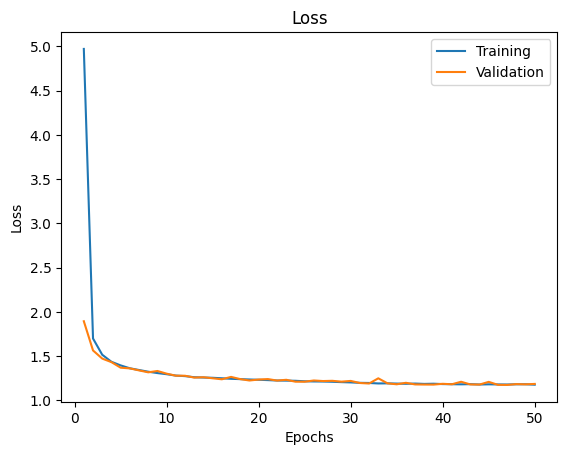

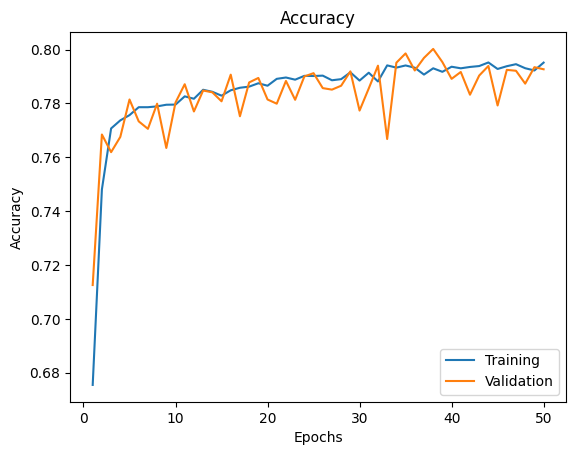

In [51]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history)
plot_accuracy(history)

---

## Inspecting Layers

In [31]:
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))

Layers - Network Configuration:

dense_10 True
Layer Configuration:
{'name': 'dense_10', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dense_11 True
Layer Configuration:
{'name': 'dense_11', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUn

In [32]:
for layer in model.layers:
  print(layer.get_config(),
        layer.get_weights(),)

{'name': 'dense_10', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.03643361, -0.05758376, -0.04161336, ...,  0.05975859,
         0.04442901,  0.06550013],
       [-0.00949244,  0.04086692,  0.00059558, ..., -0.06037709,
         0.07382537,  0.01848573],
       [ 0.02065324, -0.01404825, -0.07972461, ..., -0.05229381,
         0.00741665,  0.04143001],
       ...,
       [ 0.30095986,  0.13253503,  0.11491723, ..., -0.04036687,
         0.24341284, -0.01272197],
       [-0.0221734

In [33]:
layer = model.layers[3]

print(layer.get_config())
print(layer.get_weights())

{'name': 'dense_13', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[-0.18764706, -0.0956119 , -0.01690892, ..., -0.22044316,
         0.0071916 , -0.00150167],
       [-0.18323597,  0.00308078, -0.05235658, ..., -0.37468317,
        -0.09003051,  0.03530531],
       [ 0.11363114, -0.1055483 , -0.05543215, ..., -0.20142171,
        -0.10253696,  0.14584956],
       ...,
       [ 0.04215727, -0.15321773, -0.12900507, ...,  0.03480226,
         0.06558157, -0.39066458],
       [-0.0114303

# 🛂 Regularization

Regularization is a technique that makes slight changes to the learning algorithm to reduce overfitting and generalize better. This in turn improves the performance of the model even on invisible data (test set).

### L1 Kernel/Bias regularization

Applying [L1 regularization](https://keras.io/api/layers/regularizers/) to the kernel and bias values. New loss function: $$L(x,y) = L(x,y) + \lambda\sum_{j=0}^{M}|W_j|$$

where:
*   $\lambda$ parameter controls the impact of regularization
*   $W$ corresponds to the model weights



In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

%matplotlib inline

In [35]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

dims = X_train.shape[1]

nb_classes = 10

## L1 Regularization in Practice

Use the model defined above and create a copy of it with L1 regularization applied to each layer.


*   How does the network's performance change?
*   How do different magnitudes of the regularization parameter affect the network's performance?

In [45]:
from keras import activations
from keras import regularizers

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu, kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(256, activation=activations.relu, kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(256, activation=activations.relu, kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(128, activation=activations.relu, kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(64, activation=activations.relu, kernel_regularizer=regularizers.L1(0.001)))
model.add(Dense(10, activation=activations.softmax, kernel_regularizer=regularizers.L1(0.001)))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,842 (2.44 MB)

 Trainable params: 640,842 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

### L2 Kernel/Bias regularization

Applying [L2 regularization](https://keras.io/api/layers/regularizers/) to the kernel and bias values. New loss function: $$L(x,y) = L(x,y) + \lambda\sum_{j=0}^{M}W_j^2$$

where:
*   $\lambda$ parameter controls the impact of regularization
*   $W$ corresponds to the model weights



## L2 Regularization in Practice

Use the model defined above and create a copy of it with L2 regularization applied to each layer.


*   How does the network's performance change?
*   How do different magnitudes of the regularization parameter affect the network's performance?

In [46]:
from keras import activations
from keras import regularizers

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu, kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(256, activation=activations.relu, kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(256, activation=activations.relu, kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(128, activation=activations.relu, kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(64, activation=activations.relu, kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(10, activation=activations.softmax, kernel_regularizer=regularizers.L2(0.001)))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,842 (2.44 MB)

 Trainable params: 640,842 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

## L1L2 Regularization in Practice

Use the model defined above and create a copy of it with L1L2 regularization applied to each layer.


*   How does the network's performance change?
*   How do different magnitudes of the regularization parameter affect the network's performance?

In [49]:
from keras import activations
from keras import regularizers

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))
model.add(Dense(256, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))
model.add(Dense(256, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))
model.add(Dense(128, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))
model.add(Dense(64, activation=activations.relu, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))
model.add(Dense(10, activation=activations.softmax, kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.01)))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,842 (2.44 MB)

 Trainable params: 640,842 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

## Inspect and Compare Different Models

1.   Select one layer from each of the three models.
2.   Print and plot the corresponding weights ([use a heatmap from Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)) and their sum.

What differences do you observe among the weights of the three models?



### Dropout

[Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass


<img src="https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png" width="60%" />




In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

%matplotlib inline

In [53]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

dims = X_train.shape[1]

nb_classes = 10

## Dropout in Practice

Use the model defined above and create a copy of it with Dropout regularization applied to some layer.


*   How does the network's performance change?
*   How do different magnitudes of the regularization parameter affect the network's performance?

In [55]:
from keras import activations
from keras.utils import set_random_seed

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu))
model.add(Dropout(0.3))
model.add(Dense(256, activation=activations.relu))
model.add(Dropout(0.1))
model.add(Dense(256, activation=activations.relu))
model.add(Dropout(0.1))
model.add(Dense(128, activation=activations.relu))
model.add(Dense(64, activation=activations.relu))
model.add(Dense(10, activation=activations.softmax))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,842 (2.44 MB)

 Trainable params: 640,842 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7764 - loss: 0.6201 - val_accuracy: 0.8329 - val_loss: 0.4652
Epoch 2/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8364 - loss: 0.4521 - val_accuracy: 0.8530 - val_loss: 0.4003
Epoch 3/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8525 - loss: 0.4066 - val_accuracy: 0.8567 - val_loss: 0.3798
Epoch 4/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8600 - loss: 0.3858 - val_accuracy: 0.8644 - val_loss: 0.3707
Epoch 5/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8651 - loss: 0.3729 - val_accuracy: 0.8706 - val_loss: 0.3502
Epoch 6/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8692 - loss: 0.3574 - val_accuracy: 0.8674 - val_loss: 0.3581
Epoch 7/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.3424 - val_accuracy: 0.8649 - val_loss: 0.3662
Epoch 8/50
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8756 - loss: 0.3363 - val_accuracy: 0.

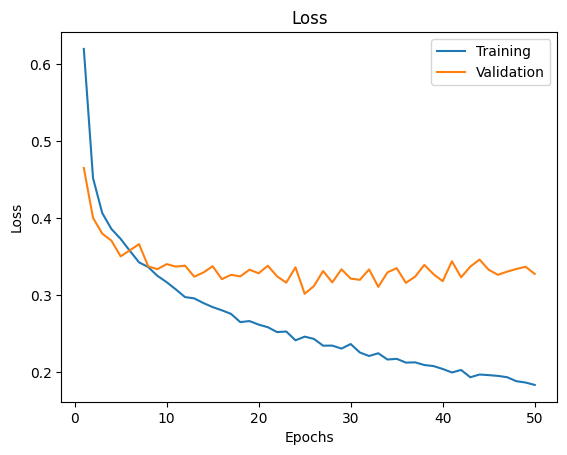

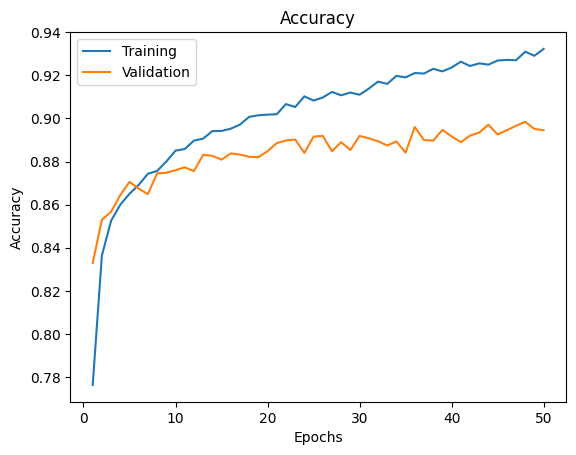

In [57]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history)
plot_accuracy(history)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

%matplotlib inline

In [59]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

Y_train =  to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

dims = X_train.shape[1]

nb_classes = 10

## Early stopping in Practice

Use the model defined above and create a copy of it. Train the model for a large number of epochs (around 500) and apply early stopping with different hyperparameter settings.

*   How does the network's performance change?
*   How do different values of the regularization parameter influence the performance of the network?

In [61]:
from keras import activations
from keras.utils import set_random_seed
from keras.callbacks import EarlyStopping

# Keras Seed: Reproducible weights initialization
# set_random_seed(333)

model = Sequential()

model.add(Input((784,)))
model.add(Dense(512, activation=activations.relu))
model.add(Dense(256, activation=activations.relu))
model.add(Dense(256, activation=activations.relu))
model.add(Dense(128, activation=activations.relu))
model.add(Dense(64, activation=activations.relu))
model.add(Dense(10, activation=activations.softmax))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,842 (2.44 MB)

 Trainable params: 640,842 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=500, batch_size=64, validation_split=0.2, verbose=1, callbacks=[earlystop])

Epoch 1/500
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9883 - loss: 0.0337 - val_accuracy: 0.8960 - val_loss: 0.6882
Epoch 2/500
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.8954 - val_loss: 0.7222
Epoch 3/500
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.8964 - val_loss: 0.7560
Epoch 4/500
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.8959 - val_loss: 0.7832
Epoch 5/500
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.8957 - val_loss: 0.8116
Epoch 6/500
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.8961 - val_loss: 0.8316


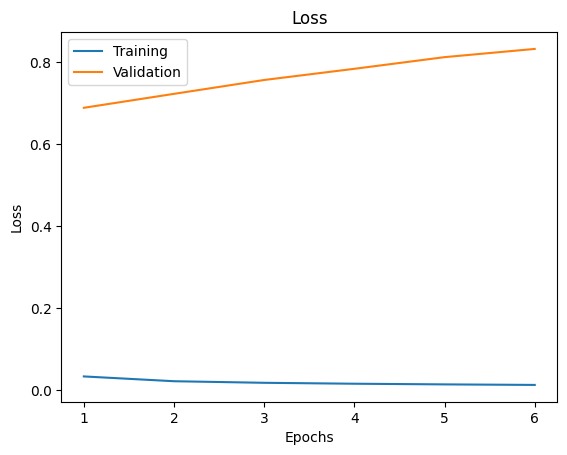

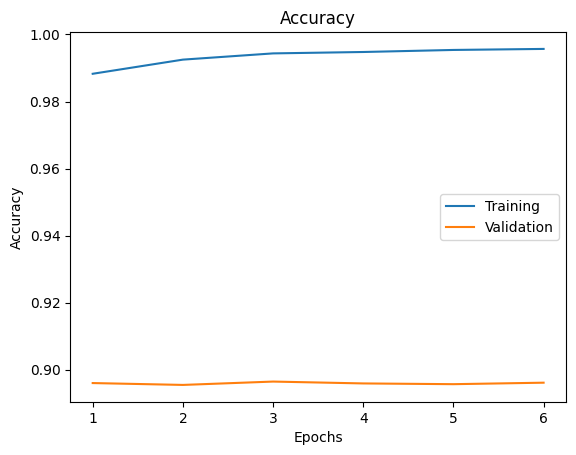

In [69]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(history)
plot_accuracy(history)

## 📕 Exercise

Take a [dataset](https://keras.io/api/datasets/) from keras (or from Kaggle), create a neural network and apply regulizers. Monitor the effect on model performance and analyze how the loss and accuracy changes by using regularization methods during training.

Plot and analyze the weights of the network using different regularization methods (particularly L2 and Dropout) and also compare with the use of different learning rate values.